# Parte III. Búqueda de Tópicos con BioBERT + CorEx

**Herramienta Interactiva de Búsqueda utilizando BioBERT y el Modelamiento de Tópicos con CorEx**  
Basado, entre otras fuentes de consulta, en el notebook de `John David Parsons`  
https://www.kaggle.com/jdparsons/biobert-corex-topic-search

En respuesta al reto Kaggle: 

**COVID-19 Open Research Dataset Challenge (CORD-19)**  
*An AI challenge with AI2, CZI, MSR, Georgetown, NIH & The White House*  
https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

**Integrantes**
<table align="left">
  <tr>
    <td>Sandra Torres</td>
    <td>Wendy Jara</td>    
  </tr>
  <tr>
    <td>Edwin Rodriguez</td>
    <td>Christian Pichucho</td>
  </tr>
  <tr>
    <td>Jorge Vargas</td>
    <td>Milton Fonseca</td>
  </tr>
  <tr>
    <td>Sebastián Ayala</td>
    <!--<td bgcolor="LightGray">Coordinador</td>-->
    <td><i>*Coordinador</i></td>
  </tr> 
</table>  
  

<table align="left">
  <caption>Fuentes de Consulta</caption>
  <thead>
      <tr>
        <th>Recurso</th>
        <th>Autor(es)</th>
        <th>Descripción</th>
      </tr>
  </thead>    
  <tbody>
      <tr>
        <td><a href="https://www.kaggle.com/maksimeren/covid-19-literature-clustering">COVID-19 Literature Clustering</a></td>
        <td>MaksimEkin (Kaggle)</td>
        <td>Agrupación (Clustering) No Supervisado, por K-Means, PCA y otros métodos (Reto Kaggle: Covid-10) <a href="https://github.com/MaksimEkin/COVID19-Literature-Clustering">github code</a></td>  
      </tr>
      <tr>
        <td><a href="https://www.kaggle.com/ivanegapratama/covid-eda-initial-exploration-tool">COVID EDA: Initial Exploration Tool</a></td>
        <td>Ivan Ega Pratama (Kaggle)</td>
        <td>Herramienta Exploratoria del dataset del Reto Kaggle: Covid-10</td>
      </tr>      
      <tr>
        <td><a href="https://www.kaggle.com/danielwolffram/topic-modeling-finding-related-articles">Topic Modeling: Finding Related Articles</a></td>
        <td>Daniel Wolffram (Kaggle)</td>
        <td>De este artículo se toma el concepto de creación de "Stop Words" personalizadas</td>
      </tr>
      <tr>
        <td><a href="https://www.kaggle.com/jdparsons/biobert-corex-topic-search">BioBERT+CorEx Topic Search</a></td>
        <td>John David Parsons</td>
        <td>Herramienta Interactiva de Búsqueda utilizando BioBERT y el Modelamiento de Tópicos con CorEx</td>  
      </tr>
      <tr>
        <td><a href="https://www.kaggle.com/jdparsons/interactive-abstract-and-expert-finder">Interactive Abstract and Expert Finder</a></td>
        <td>John David Parsons</td>
        <td>Motor de Búsqueda Interactivo para Resúmenes y Autores</td>  
      </tr>
      <tr>
        <td><a href="https://www.kaggle.com/dgunning/cord-research-engine-search-and-similarity">CORD Research Engine - Search and Similarity</a></td>
        <td>Dwight Gunning</td>
        <td>Motor de Investigación del dataset CORD - Búsuqueda y Semejanza</td>
      </tr>            
  </tbody>
</table>

# Resumen

El resultado final de este cuaderno es un motor de búsqueda interactivo para resúmenes de artículos (título + resumen). A medida que un usuario escribe su pregunta, se clasifican más de 22,000 resúmenes en tiempo real y se muestra el resultado más relevante.

Además, los usuarios pueden filtrar por temas determinados automáticamente.
La ejecución de este notebook demora aproximadamente 3 minutos.
Desplácese hacia abajo para ver el siguiente widget de búsqueda:

# Metodología

Archivo de entrada: `all_sources_metadata_2020-03-13.csv`. Título y Abstract se combinan en un solo "Documento", el cual se vectoriza utilizando el modelo BioBERT (BERT pre-entrenado en texto médico). El modelamiento de tópicos/clústers utilizando CorEx se aplicó sobre los tokens pre-procesados de los documentos, dentro del archivo `df_final_covid_clean_topics.pkl`.

# 1. Setup Previo

## 1.1 Cargar datos de drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1.2 Parámetros
Utilizar datos pre-procesados y vectorizados o un subset de datos sólamente etiquetados

In [2]:
# Flags y Parámetros Generales
flag_use_generated_files = True # True utiliza los datos (vectorizados) generados por el notebook asociado
flag_use_google_drive = True # True utiliza el modelo guardado en drive
vectorize_subset = 50 # subset de datos a vectorizar (-1 para procesar todo el set de datos)
vectorize_subset = 100
#vectorize_subset = -1

# Nombres de Archivos
file_df_topics = 'df_final_covid_clean_topics.pkl'
file_bert_vectors = 'df_biobert_vectors.pkl'

# Path de Directorios
# NOTA: Modificar los directorios de acuerdo a la organización de su proyecto y archivos
# en Google Drive.
path_folder_root = '/content/drive/My Drive'
path_models = path_folder_root + '/BERT/models'
path_folder_project_clustering = path_folder_root + '/NLP/projects/interactive-abstract-and-expert-finder'
path_folder_project_bert = path_folder_root + '/NLP/projects/bert'
path_folder_input = '/input'
path_folder_output = '/output'


# Path de Archivos

# [df_final_covid_clean_topics.pkl]
# Siempre será leído, independientemente del valor (True|False) de la variable:
# 'flag_use_generated_files'.
# Sin embargo, su utilización si variará según el valor de dicha variable,
# (ver sección 1.5 Cargar datos de Caché).
# NOTA: Este dataframe es producto del notebook asociado (previo) al presente.
path_file_df_topics = path_folder_project_clustering + path_folder_output + '/' + file_df_topics 

# [df_biobert_vectors.pkl]
# NOTA: La primera vez que se ejecute este Notebook se lo debe hacer con la variable
# flag_use_generated_files = False, para que se cree este archivo.
path_file_df_bert_vectors = path_folder_project_bert + path_folder_output + '/' + file_bert_vectors 

# Parámetros BERT y BERT as a Service
# Para configuración de parámetros utilizando el Modelo Afinado, revisar documentación:
# https://readthedocs.org/projects/bert-as-service/downloads/pdf/latest/
# 2.3.2 Serving a fine-tuned BERT model
bert_model = 'biobert_v1.1_pubmed'  # Modelo pre-entrenado
bert_model_fine_tuned = 'fine-tuned/model' # Modelo afinado
dict_bert_params = {}
dict_bert_params['model_dir'] = path_models + '/' + bert_model  # Se acualizará (de ser necesario) en la sección 1.3 
#dict_bert_params['ckpt_name'] = 'model.ckpt-1000000' # Checkpoint de modelo pre-entrenado
dict_bert_params['ckpt_name'] = 'model.ckpt-1023'     # Checkpoint de modelo afinado
dict_bert_params['tuned_model_dir'] = path_models + '/' + bert_model_fine_tuned
dict_bert_params['max_seq_len'] = 'None'
dict_bert_params['max_batch_size'] = '32'
dict_bert_params['num_worker'] = '1'  

In [3]:
# Construir Diccionario de Parámetros y mostrarlos
# https://stackoverflow.com/questions/6531482/how-to-check-if-a-string-contains-an-element-from-a-list-in-python
paramToCheck = ['file', 'folder', 'bert', 'flag']

dict_params = dict(
    filter(lambda item:  any(item[0].find(paramType) != -1 for paramType in paramToCheck)
                  and isinstance(item[1], (str, bool)),
           globals().items())
    )

print(len(dict_params))

for param in sorted(dict_params):
  print( str(param + ':\t').rjust(30) + str(dict_params[param]))

13
                  bert_model:	biobert_v1.1_pubmed
       bert_model_fine_tuned:	fine-tuned/model
           file_bert_vectors:	df_biobert_vectors.pkl
              file_df_topics:	df_final_covid_clean_topics.pkl
    flag_use_generated_files:	True
       flag_use_google_drive:	True
   path_file_df_bert_vectors:	/content/drive/My Drive/NLP/projects/bert/output/df_biobert_vectors.pkl
         path_file_df_topics:	/content/drive/My Drive/NLP/projects/interactive-abstract-and-expert-finder/output/df_final_covid_clean_topics.pkl
           path_folder_input:	/input
          path_folder_output:	/output
    path_folder_project_bert:	/content/drive/My Drive/NLP/projects/bert
path_folder_project_clustering:	/content/drive/My Drive/NLP/projects/interactive-abstract-and-expert-finder
            path_folder_root:	/content/drive/My Drive


## 1.3 Instalación de Módulos

### 1.3.1 BERT as a Service

In [4]:
# Instalar Servidor
!pip install -U bert-serving-server
#!pip install bert-serving-server==1.10.0

# Instalar CLiente
!pip install -U bert-serving-client
#!pip install bert-serving-client==1.10.0


     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=fb026ea2c78337d2541f1c7fb1be7ee853ecccc7ab76c2e6ac48c3565063f3b8
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil


In [5]:
# Descargar Modelo Pre-entrenado a usar
# (como alternativa al modelo que reside en el Drive de Google)
if flag_use_google_drive == False:
  !pip install wget

  import wget
  import os

  bert_model_file_path = './' + bert_model + '.zip'

  # Descargar el modelo en caso de no tenerlo disponible aún
  if not os.path.exists(bert_model_file_path):
    print('\nDownloading BERT Model...')
    wget.download(url, bert_model_file_path)
    print('BERT Model downloaded')
  else:
    print('BERT Model already present!')

  !ls
else:
  print(f"Se usará el modelo {dict_bert_params['model_dir']} desde Google Drive")

Se usará el modelo /content/drive/My Drive/BERT/models/biobert_v1.1_pubmed desde Google Drive


In [6]:
if flag_use_google_drive == False:
  # Descomprimir el modelo, en caso de haberse descargado por primera vez
  bert_model_folder_path = bert_model_file_path.rstrip(".zip")
  # './uncased_L-12_H-768_A-12/'

  if not os.path.exists(bert_model_folder_path):
    !unzip $bert_model

  !ls -la

### 1.3.2 CorEx

In [7]:
# CorEx topic modeling dependencies
# https://github.com/gregversteeg/corex_topic
!pip install 'corextopic'

## 1.4 Importar Módulos

In [8]:
# NOTA: Al ejecutar `import tensorflow` se importará por defecto vla versión 2.x (actualmente).
# Se puede utilizar la versión 1.x al ejecutar una celda con el comando 'mágico' `tensorflow_version`
# antes de ejecutar `import tensorflow`.

# TensorFlow versions in Colab
# https://colab.research.google.com/notebooks/tensorflow_version.ipynb#scrollTo=8UvRkm1JGUrk

# *How to downgrade tensorflow version in colab?*  
# https://stackoverflow.com/questions/51888118/how-to-downgrade-tensorflow-version-in-colab/54445624
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [9]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as ss
import subprocess
import pandas as pd
import pickle as pkl
import tensorflow

from corextopic import corextopic as ct
#from ipywidgets import interact, widgets #Widget interactivo
from ipywidgets import widgets #Widget interactivo
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import cdist

In [10]:
print('tensorflow.version', tensorflow.version)

tensorflow.version <module 'tensorflow._api.v1.version' from '/tensorflow-1.15.2/python3.6/tensorflow_core/_api/v1/version/__init__.py'>


### 1.4.1 Determinar Path del Modelo Bert a usar


In [11]:
# a. Si se utilizará el Directorio Local
if flag_use_google_drive == False:
  root_path = !pwd
  #print("type(root_path):", type(root_path))
  path_bert_model = root_path[0] + '/' + bert_model
  # Actualizar Valor Diccionario
  dict_bert_params['model_dir'] = path_bert_model
  print(f"Se usará el modelo '{bert_model}' descargado en el Directorio Local")
  print(f"Path del Modelo: {path_bert_model}")  
# b. Si se lee desde Google Drive, la variable 'path_bert_model' ya está configurada
else:
  print(f"Se usará el modelo {dict_bert_params['model_dir']} desde Google Drive")

Se usará el modelo /content/drive/My Drive/BERT/models/biobert_v1.1_pubmed desde Google Drive


## 1.5 Cargar datos de Caché 

Datos vectorizados, o etiquetados según indique la variable `flag_use_generated_files`

In [12]:
%%time
# Determinar si se deben tomar los datos vectorizados (BERT) desde caché
print("flag_use_generated_files: ", flag_use_generated_files)

if flag_use_generated_files is True:
    df = pkl.load(open(path_file_df_bert_vectors, "rb")) # df_biobert_vectors.pkl
    print(f"# df_biobert_vectors:", len(df))

    unvectorized_df = pkl.load(open(path_file_df_topics, "rb")) # df_final_covid_clean_topics.pkl
    print(f"# df_final_covid_clean_topics:", len(unvectorized_df))

    df['clean_tfidf'] = unvectorized_df['clean_tfidf'] # copiar de nuevo las palabras pre-procesadas y tokenizadas por CorEx
    
    print(f"Datos tomados de [path_file_df_bert_vectors]: {path_file_df_bert_vectors}")
else:
    df = pkl.load(open(path_file_df_topics, "rb")) # df_final_covid_clean_topics.pkl
    print(f"# df_final_covid_clean_topics:", len(df))

    df = df.reset_index() # en caso que los 'indices no sean secuenciales
    print(f"Datos tomados de [path_file_df_topics]: {path_file_df_topics}")

flag_use_generated_files:  True
# df_biobert_vectors: 100
# df_final_covid_clean_topics: 48510
Datos tomados de [path_file_df_bert_vectors]: /content/drive/My Drive/NLP/projects/bert/output/df_biobert_vectors.pkl
CPU times: user 2.71 s, sys: 526 ms, total: 3.24 s
Wall time: 8.28 s


In [13]:
df.head(3)

,cord_uid,title,abstract,authors,arxiv_id,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,document,clean_tfidf,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,best_topic,biobert_vector
0,muvuqh16,Analytical use of multi-protein fluorescence r...,Experiments measuring Fluorescence Resonance E...,"Krause, Christopher D.; Izotova, Lara S.; Pest...",NaN,True,False,custom_license,http://europepmc.org/articles/pmc3770794?pdf=r...,Analytical use of multi-protein fluorescence r...,"[sequence, requirement, rna, strand, transfer,...",-23.255566,-17.802959,-18.059803,-2.644085e-07,-5.805275e-08,-4.701813,-9.939499,0.000000,-12.167829,-10.824741,0.000000,-7.141801,-9.875667,-11.438728,-0.337453,-3.520517e-11,-10.243940,-0.000095,-0.913890,-1.255329e+01,topic_7,"[-0.4309781491756439, -0.6207254528999329, 1.0..."
1,w7p8ieox,Electron microscopy for the rapid detection an...,The advantages of using electron microscopy fo...,"Fong, C. K.",NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,Electron microscopy for the rapid detection an...,"[crystal_structure, murine, coronavirus, recep...",-18.508302,-17.802959,-18.875843,-1.397559e+01,-1.577202e+01,-11.051991,-12.052258,-5.314429,-9.279369,-8.231340,-7.512392,-8.080308,-10.854807,-11.451641,-9.410850,-8.643819e+00,-10.263285,-10.004897,-12.239449,-6.278326e-02,topic_19,"[0.03645655885338783, -0.5848348140716553, 0.1..."
2,ma9h8v0s,Mechanisms of Primary Axonal Damage in a Viral...,Multiple sclerosis (MS) is an inflammatory dem...,"Das Sarma, Jayasri; Kenyon, Lawrence C.; Hingl...",NaN,False,False,NaN,http://www.jneurosci.org/content/29/33/10272.f...,Mechanisms of Primary Axonal Damage in a Viral...,"[synthesis, novel, hepatitis, ribosomal_frames...",-20.942383,-17.802959,-18.704205,-2.763481e-06,-4.048854e-01,-12.472998,-8.694075,-8.880652,-9.346087,-5.736519,-12.116017,-7.372704,-0.643723,-9.107487,-10.008615,0.000000e+00,-8.893621,-1.722459,-0.016163,-2.484059e-07,topic_15,"[-0.13306663930416107, -1.3125724792480469, -0..."


## 1.6 Limpiar Registros

In [14]:
# Solamente si los datos NO son cargados desde Caché
if flag_use_generated_files == False:
  df = df.dropna(subset=['abstract'])
  print("Shape after Droping NaN in 'abstract': ", df.shape)

  df = df.dropna(subset=['title'])
  print("Shape after Droping NaN in 'title': ", df.shape)

  df['document'] = df['title'] + '. ' + df['abstract']  
else:
  print("Los datos fueron cargados desde Caché los cuales ya fueron depurados")

print("dataframe's final shape: ", df.shape)

Los datos fueron cargados desde Caché los cuales ya fueron depurados
dataframe's final shape:  (100, 33)


# 2. Modelamiento de tópicos con CorEx


### 2.1. Función Dummy para usar datos en cache


In [15]:
def dummy(doc):
    return doc

print("flag_use_generated_files:", flag_use_generated_files)

# NOTA: para procesar los datos sin utilizar el archivo de cache (vectorizar nuevamente)
# comentar los parámetros dummy de la función CountVectorizer
"""
vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
)
"""
if flag_use_generated_files == True: # Usar datos desde cache
  vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
  )
else: # No usar datos desde cache
  vectorizer = CountVectorizer()

flag_use_generated_files: True


### 2.2. CorEx Topic Modeling


Se encontró que el número óptimo de tópicos era entre 16-24, pero se puede experimentar con diferentes valores de `target_num_topics`. Debido a que se están usando datos pre-tokenizados de desde el dataframe en caché, se usa una función ficticia en `CountVectorizer` (la cual se puede modificar si no se desea trabajar con los datos en caché).

In [16]:
%%time

# a) Leyendo desde caché: toma entre 30-60 segundos dependiendo de cuántos tópicos CorEx se selecciona
# b) Sin leer desde caché: toma alrededor de 6 minutos, dependiendo de:
#    - cuántos registros tiene el dataframe
#    - cuántos tópicos CorEx se selecciona

target_num_topics = 20 # tópicos a identificar por CorEx

# NOTA: para procesar los datos sin utilizar el archivo de cache (vectorizar nuevamente)
# en la siguiente línea, utilizar df['document'] en lugar de df['clean_tfidf']
print("flag_use_generated_files:", flag_use_generated_files)

column_source = ''

if flag_use_generated_files == True: # Usar datos desde cache
  column_source = 'clean_tfidf'
else: # No usar datos desde cache
  column_source = 'document'
  # NOTA: esto incrementará el tiempo de ejecución de esta celda

corex_docs = df[column_source].tolist()
doc_word = vectorizer.fit_transform(corex_docs)

doc_word = ss.csr_matrix(doc_word)

# Obtener las etiquetas de las columnas necesario para extraer los tópicos y hacer más fácil el anclaje
words = list(np.asarray(vectorizer.get_feature_names()))

# https://github.com/gregversteeg/corex_topic
# Entrenar el modelo CorEx con x tópicos (n_hidden)
topic_model = ct.Corex(n_hidden=target_num_topics, words=words, max_iter=1000, verbose=False, seed=2020)

# Se puede dar un inicio semilla a CorEx para mejorar el anclaje. Se requiere expertís en el área
#topic_model.fit(doc_word, words=words, anchors=[
#    ['transmission', 'incubation'],
#    ['bat', 'pig', 'porcine'],
#    ['national','international','policy', 'public_health', 'public']
#], anchor_strength=2)

# o utilizar en forma por defecto
topic_model.fit(doc_word, words=words)

flag_use_generated_files: True
CPU times: user 11.8 s, sys: 66.9 ms, total: 11.8 s
Wall time: 11.9 s


###  2.3 Graficar los pesos de los tópicos

0: inhibitor,inhibition,normal,investigate,threedimensional,together,bind,hour,potent,recruitment
1: useful,appear,organism,available,closely_related,alignment,despite,selection,distinguish,emergence
2: whole,whether,structural,multiple,provide,polymorphism,approximately,amino_acid,phylogeny,software
3: syndrome_sars,conclusion,background,severe_acute_respiratory,sars,coronavirus,rate,infectious_disease,explore,data
4: rna,relationship,genomic,primer,heterogeneous,secretion,origin,algorithm,wildtype,marker
5: rapidly,vaccine,develop,become,conduct,large,specific,natural,debate,even
6: still,research,example,predict,month,grow,content,often,system,reveal
7: various,event,resource,classical,model,improve,differentiation,discuss,ratio,planning
8: make,average,challenge,paper,recover,question,improvement,hospital,public_health,every
9: possible,family,domain,furthermore,demonstrate,share,characterize,conserve,contain,member
10: immediate,agent,set,link,introduction,contact,central,widespre

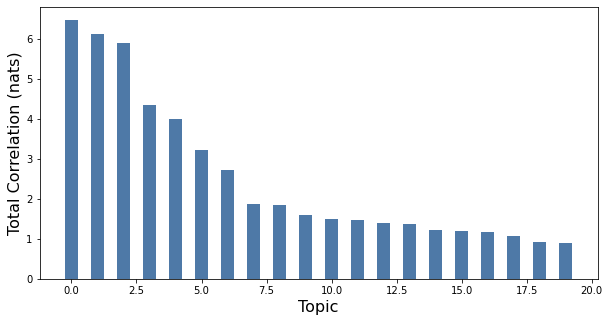

In [17]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);
# Ningún tema único debería contribuir demasiado.
# Si uno lo hace, eso indica texto repetitivo, se requiere más procesamiento previo.
# Para encontrar el número óptimo de temas, debemos seguir agregando tópicos hasta que
# temas adicionales no contribuyan significativamente a la CT general.

topics = topic_model.get_topics()
topic_list = []

for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))
    topic_list.append('topic_' + str(n) + ': ' + ', '.join(topic_words))

### 2.4. Agrupar tópicos


In [18]:
%%time

# Entrenar capas jerárquicas sucesivas
tm_layer2 = ct.Corex(n_hidden=4)
tm_layer2.fit(topic_model.labels)

layer2_topics = tm_layer2.get_topics()
parents = []

for parent_topic in layer2_topics:
    layer_obj = {
        'keys': [],
        'words': []
    }
    
    for ind, _ in parent_topic:
        layer_obj['keys'] += [ind]
        layer_obj['words'] += [w[0] for w in topics[ind]][0:3]
    
    parents.append(layer_obj)

print('\n')

for p_topic in parents:
    key_str = [str(k) for k in p_topic['keys']]
    keys = ','.join(key_str)
    top_words = ','.join(p_topic['words'])
    
    print('PARENT GROUP: ' + keys)
    print(top_words + '\n')

NOTE: 'words' not provided to CorEx. Returning topics as lists of column indices


PARENT GROUP: 11,3,9,10,17,18,2,19
sarscov,know,since,syndrome_sars,conclusion,background,possible,family,domain,immediate,agent,set,decrease,mechanism,yield,nucleotide,understand,four,whole,whether,structural,public,intracellular,formation

PARENT GROUP: 12,0,7
cellular,require,serve,inhibitor,inhibition,normal,various,event,resource

PARENT GROUP: 8,15,14,1,13
make,average,challenge,outbreak,tool,specie,signal,approach,present,useful,appear,organism,day,highly,addition

PARENT GROUP: 4,6,5,16
rna,relationship,genomic,still,research,example,rapidly,vaccine,develop,mrna,expression,follow

CPU times: user 84.6 ms, sys: 964 µs, total: 85.6 ms
Wall time: 85.1 ms


### 2.5 Dar un puntaje a cada documento
Cada documento obtiene un puntaje por cada tema con puntajes de probabilidad CorEx. Un sólo documento puede obtener una alta puntuación en múltiples temas.

In [19]:
# Quitar columnas existentes de corridas previas
for c in [col for col in df.columns if col.startswith('topic_')]:
    del df[c]

for topic_num in range(0, len(topics)):
    # CorEx almacena los puntajes de probabilidad en el mismo orden que el documento fuente, por lo que el índice coincidirá
    df['topic_' + str(topic_num)] = topic_model.log_p_y_given_x[:,topic_num]

Para fines de visualización, crear una columna final "best_topic", con el tema de mayor puntuación para una fila.
La IU de búsqueda le permitirá ver opcionalmente todas las puntuaciones de los temas

In [20]:
corex_cols = [col for col in df if col.startswith('topic_')]
df['best_topic'] = df[corex_cols].idxmax(axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cord_uid           100 non-null    object 
 1   title              100 non-null    object 
 2   abstract           100 non-null    object 
 3   authors            100 non-null    object 
 4   arxiv_id           2 non-null      object 
 5   has_pdf_parse      100 non-null    bool   
 6   has_pmc_xml_parse  100 non-null    bool   
 7   full_text_file     81 non-null     object 
 8   url                99 non-null     object 
 9   document           100 non-null    object 
 10  clean_tfidf        100 non-null    object 
 11  best_topic         100 non-null    object 
 12  biobert_vector     100 non-null    object 
 13  topic_0            100 non-null    float64
 14  topic_1            100 non-null    float64
 15  topic_2            100 non-null    float64
 16  topic_3            100 non-

In [22]:
topics

[[('inhibitor', 0.10091360837281421),
  ('inhibition', 0.0855446381422037),
  ('normal', 0.07871374622264378),
  ('investigate', 0.06841341272354495),
  ('threedimensional', 0.05705085498818017),
  ('together', 0.05705085498818017),
  ('bind', 0.05705085498818017),
  ('hour', 0.05705085498818017),
  ('potent', 0.05705085498818017),
  ('recruitment', 0.05705085498818017)],
 [('useful', 0.12773654632945863),
  ('appear', 0.1042072452706628),
  ('organism', 0.1042072452706628),
  ('available', 0.08903248963611674),
  ('closely_related', 0.0812857390987858),
  ('alignment', 0.0812857390987858),
  ('despite', 0.0812857390987858),
  ('selection', 0.06844532150101884),
  ('distinguish', 0.05893559439229997),
  ('emergence', 0.05893559439229997)],
 [('whole', 0.11128570186065287),
  ('whether', 0.08680263152897306),
  ('structural', 0.08201781404717401),
  ('multiple', 0.0687708356140766),
  ('provide', 0.06602320895279634),
  ('polymorphism', 0.0629711835131853),
  ('approximately', 0.0629711

In [23]:
# Verificación de presencia de pesos negativos en las palabras de los tópicos
print("flag_use_generated_files: ", flag_use_generated_files)

print("len(topics): ", len(topics))
print("type(topics): ", type(topics), "\n")

count = 0 # Número de Pesos Negativos
total = 0 # Total de Palabras

for idx, topic in enumerate(topics):
  for i, word_tuple in enumerate(topic):
    word, score = word_tuple

    # Si el peso/puntaje de la palabra es negativo
    if score < 0:
      count += 1
      print(f"Tópico[{idx}]: palabra={word}, indice={i}, peso={score}, total_palabras={len(topic)}")

    # Contabilizar palabras iteradas
    total += 1

print(f"Número de palabras iteradas: {total}")
print(f"Número de palabras con factor de correlación negativo: {count}")

flag_use_generated_files:  True
len(topics):  20
type(topics):  <class 'list'> 

Tópico[5]: palabra=specific, indice=6, peso=-0.05592857508262628, total_palabras=10
Tópico[6]: palabra=reveal, indice=9, peso=-0.048326651043319686, total_palabras=10
Tópico[10]: palabra=set, indice=2, peso=-0.07562679653158433, total_palabras=10
Tópico[13]: palabra=development, indice=8, peso=-0.06770513218228569, total_palabras=10
Tópico[14]: palabra=inhibit, indice=6, peso=-0.06708649610512007, total_palabras=10
Tópico[15]: palabra=significant, indice=4, peso=-0.08494451540990078, total_palabras=10
Tópico[15]: palabra=associate, indice=8, peso=-0.06089219660853635, total_palabras=10
Tópico[15]: palabra=significantly, indice=9, peso=-0.06089219660853635, total_palabras=10
Tópico[16]: palabra=population, indice=6, peso=-0.06628681871094128, total_palabras=10
Tópico[19]: palabra=common, indice=9, peso=-0.05499509802587838, total_palabras=10
Número de palabras iteradas: 200
Número de palabras con factor de 

In [24]:
# Verificar contenido (palabras y factor de correlación) de un determinado tópico
idx = 5
topics[idx]

[('rapidly', 0.07624847251075617),
 ('vaccine', 0.07624847251075617),
 ('develop', 0.07624847251075617),
 ('become', 0.06238583360475073),
 ('conduct', 0.06189728789802446),
 ('large', 0.06189728775421261),
 ('specific', -0.05592857508262628),
 ('natural', 0.05524245353605743),
 ('debate', 0.05524245353605743),
 ('even', 0.05524245353605743)]

In [25]:
%%time
from wordcloud import WordCloud

# Crear directorio images
!mkdir -p /content/images

wc = WordCloud(background_color='white')
# Generar nubes de palabras
for i in range(len(topics)):
  topic = [topic for topic in topics[i] if topic[1]>0]
  # topics es una lista de listas de tuplas
  # parámetro frequencies de generate_from_frequencies es un dict de string a float
  wc.generate_from_frequencies(dict(topic))
  wc.to_file('/content/images/topic_%d.png' % i)

# 3. Vectorización BioBERT


### 3.1. Iniciar Servicio BERT


#### 3.1.1 Levantar el servicio

Esto iniciará un servicio con los workers (hilos) `num_worker`, lo que significa que puede manejar hasta` num_worker` solicitudes concurrentes. Se pondrán en cola más solicitudes simultáneas en un balanceador de carga.

Utilizar `subprocess` para iniciar el servicio en background  
https://www.kaggle.com/jdparsons/biobert-corex-topic-search

In [31]:
import itertools

# 1. Generar lista de Parámetros (para luego alimentarlos a 'subprocess')
dict_bert_params
# a) Transformar el Diccionario a Lista de Tuplas de Parámetros
# anteponiendo el signo - al nombre de cada parámetro
list_bert_params = [ ("-" + key, value) for key, value in dict_bert_params.items()]
#print(list_bert_params)

# b) Aplanar la Lista de Tuplas a una Tupla simple
#https://stackoverflow.com/questions/10632839/transform-list-of-tuples-into-a-flat-list-or-a-matrix
list_bert_params = list(itertools.chain.from_iterable(list_bert_params))
#print(bert_command)

# c) Anteponer como primer elemento de la lista, al comando de inicio de Bert como Servicio
list_bert_params.insert(0,'bert-serving-start')
print(list_bert_params)
print(" ".join( ["'" + param + "'" if ' ' in param else param for param in list_bert_params] ))

['bert-serving-start', '-model_dir', '/content/drive/My Drive/BERT/models/biobert_v1.1_pubmed', '-ckpt_name', 'model.ckpt-1023', '-max_seq_len', 'None', '-max_batch_size', '32', '-num_worker', '1', '-tuned_model_dir', '/content/drive/My Drive/BERT/models/fine-tuned/model']
bert-serving-start -model_dir '/content/drive/My Drive/BERT/models/biobert_v1.1_pubmed' -ckpt_name model.ckpt-1023 -max_seq_len None -max_batch_size 32 -num_worker 1 -tuned_model_dir '/content/drive/My Drive/BERT/models/fine-tuned/model'


In [32]:
# IMPORTANTE: Sólo para PRUEBAS.
# El servicio se debe iniciar con la celda de abajo (con un SUBPROCESS, en Background), caso contrario 
# la ejecución de la actual celda no retornará (pues el servidor BERT está ejecutándose)
#!bert-serving-start -model_dir '/content/drive/My Drive/BERT/models/biobert_v1.1_pubmed-2' -ckpt_name model.ckpt-1000000 -max_seq_len=None -max_batch_size=32 -num_worker=1
#!bert-serving-start -model_dir '/content/drive/My Drive/BERT/models/biobert_v1.1_pubmed' -ckpt_name model.ckpt-1023 -max_seq_len None -max_batch_size 32 -num_worker 1 -tuned_model_dir '/content/drive/My Drive/BERT/models/fine-tuned/model'

usage: /usr/local/bin/bert-serving-start -model_dir /content/drive/My Drive/BERT/models/biobert_v1.1_pubmed -ckpt_name model.ckpt-1023 -max_seq_len None -max_batch_size 32 -num_worker 1 -tuned_model_dir /content/drive/My Drive/BERT/models/fine-tuned/model
                 ARG   VALUE
__________________________________________________
           ckpt_name = model.ckpt-1023
         config_name = bert_config.json
                cors = *
                 cpu = False
          device_map = []
       do_lower_case = True
  fixed_embed_length = False
                fp16 = False
 gpu_memory_fraction = 0.5
       graph_tmp_dir = None
    http_max_connect = 10
           http_port = None
        mask_cls_sep = False
      max_batch_size = 32
         max_seq_len = None
           model_dir = /content/drive/My Drive/BERT/models/biobert_v1.1_pubmed
no_position_embeddings = False
    no_special_token = False
          num_worker = 1
       pooling_layer = [-2]
    pooling_strategy = REDUCE_MEAN


KeyboardInterrupt: ignored

In [39]:
%%time

# the documentation recommends batch size of 16 for CPU, 256 for GPU
# Kaggle and Colab notebooks have 2 cpus, which can be num_worker param
# !bert_command = 'bert-serving-start -model_dir /kaggle/working/biobert-pretrained/biobert_v1.1_pubmed -max_seq_len=None -max_batch_size=32 -num_worker=2'

#process = subprocess.Popen(list_bert_params, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

import subprocess
process = subprocess.Popen(list_bert_params, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

CPU times: user 952 µs, sys: 11.2 ms, total: 12.1 ms
Wall time: 24.5 ms


#### 3.1.2 Monitorear procesos / servicio

In [49]:
# Enumerar los procesos de fondo de Python.
!ps ax | grep python 

     18 ?        Sl     0:04 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
    122 ?        Ssl    0:25 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-f39ca1c0-32bb-47a3-a870-3b583314b90b.json
   3734 ?        S      0:00 /bin/bash -c ps ax | grep python 
   3736 ?        S      0:00 grep python


In [48]:
# Escoger el proceso a terminar
#kill -9 pid
!kill -9 2137 #1952

In [ ]:
# Listar archivos abiertos (List Open Files) de Proceso con Id (PID)
#https://www.tecmint.com/find-out-which-process-listening-on-a-particular-port/
#lsof | grep PID
!lsof | grep 580 | head -n 5

run.sh      1     root  mem       REG                7,0          4325803 /lib/x86_64-linux-gnu/libtinfo.so.5.9 (path dev=0,50)
jupyter-n  18     root  mem       REG                7,0          4325803 /lib/x86_64-linux-gnu/libtinfo.so.5.9 (path dev=0,50)
jupyter-n  18     root  mem       REG                7,0          4325806 /lib/x86_64-linux-gnu/libutil-2.27.so (path dev=0,50)
jupyter-n  18 122 root  mem       REG                7,0          4325803 /lib/x86_64-linux-gnu/libtinfo.so.5.9 (path dev=0,50)
jupyter-n  18 122 root  mem       REG                7,0          4325806 /lib/x86_64-linux-gnu/libutil-2.27.so (path dev=0,50)


In [ ]:
# Verificar archivos abiertos por proceso correspondiente a Puerto:####
!lsof | grep :5555

#### 3.1.3 Detener servicio

Para detener el servicio, ejecute **`bert-serving-terminate -port 5555`**.

Para más detalles revise:
* README https://github.com/hanxiao/bert-as-service#starting-bertserver-from-python
* o el comando `bert-serving-terminate --help`

In [45]:
# Input default port=5555
!bert-serving-terminate -port 5555

usage: /usr/local/bin/bert-serving-terminate -port 5555
                 ARG   VALUE
__________________________________________________
                  ip = localhost
                port = 5555
             timeout = 5000

shutdown signal sent to 5555


In [46]:
# Output default port_out=5556
!bert-serving-terminate -port 5556

usage: /usr/local/bin/bert-serving-terminate -port 5556
                 ARG   VALUE
__________________________________________________
                  ip = localhost
                port = 5556
             timeout = 5000

shutdown signal sent to 5556


In [ ]:
# bert-serving-terminate HELP
#!bert-serving-terminate --help

### 3.2. Vectorización


Vectorización de la data con BioBERT en caso de no utilizar los archivos desde caché

In [41]:
%%time

# Instanciar/Iniciar Cliente BERT
from bert_serving.client import BertClient
bc = BertClient()

CPU times: user 3.72 ms, sys: 1.99 ms, total: 5.71 ms
Wall time: 110 ms


In [42]:
%%time
print("flag_use_generated_files:", flag_use_generated_files)
print("vectorize_subset:", vectorize_subset)

if flag_use_generated_files is False:
    if (vectorize_subset > -1):
        df = df.sample(frac=1).head(vectorize_subset).reset_index(drop=True)

    abstracts = df['document'].tolist()

    # agregar el vector de BioBERT a cada columna
    embeddings = bc.encode(abstracts)

    # NOTA: Se comenta este código para cambiar de estrategia y mas bien eliminar
    # las columnas del dataframe que no se necesiten.
    '''
    select_cols = ['title', 'abstract', 'authors', 'document', 'clean_tfidf', 'best_topic']
    # reducir el tamaño del DataFrame sólo a las columnas que necesitamos
    df = df[select_cols]
    '''
    remove_cols = ['level_0', 'index', 'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id',
                   'license', 'publish_time', 'journal', 'Microsoft Academic Paper ID',
                   'WHO #Covidence', 'clean']
    df.drop(remove_cols, axis=1, inplace=True)

    df['biobert_vector'] = embeddings.tolist()
    pkl.dump(df, open(path_file_df_bert_vectors, "wb")) # df_biobert_vectors.pkl

flag_use_generated_files: True
vectorize_subset: 100
CPU times: user 902 µs, sys: 0 ns, total: 902 µs
Wall time: 801 µs


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cord_uid           100 non-null    object 
 1   title              100 non-null    object 
 2   abstract           100 non-null    object 
 3   authors            100 non-null    object 
 4   arxiv_id           2 non-null      object 
 5   has_pdf_parse      100 non-null    bool   
 6   has_pmc_xml_parse  100 non-null    bool   
 7   full_text_file     81 non-null     object 
 8   url                99 non-null     object 
 9   document           100 non-null    object 
 10  clean_tfidf        100 non-null    object 
 11  best_topic         100 non-null    object 
 12  biobert_vector     100 non-null    object 
 13  topic_0            100 non-null    float64
 14  topic_1            100 non-null    float64
 15  topic_2            100 non-null    float64
 16  topic_3            100 non-

# 4. Búsqueda Interactiva


### 4.1. Crear Widget de Búsqueda y mostrar resultados




In [44]:
# Ignorar Warnings
# https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

biobert_vectors = np.array(df.biobert_vector.tolist())
total_docs = len(df.index)

def load_image(index):
  with open('/content/images/topic_%d.png' % widgetSelect.index, 'rb') as imageFile:
    image = imageFile.read()
  return image

def search_articles(argument):
  # Cargar la imagen del tema seleccionado, va primero porque toma tiempo la carga
  widgetImage.value = load_image(widgetSelect.index)

  # Vectorizar la pregunta del campo query y obtiene su score.
  query_embedding = bc.encode([widgetText.value])[0]
  
  sort_ascending = False
  score = []
  
  if widgetDropdownScoreType.value is 'Euclidean':
    score = np.sum(query_embedding * biobert_vectors, axis=1) / np.linalg.norm(biobert_vectors, axis=1)
  else:
    score = cdist(np.stack(df.biobert_vector), [query_embedding], metric="cosine")
  
  df["score"] = score
  
  # Valores de score menores en tópicos CorEx significa que hay más probabilidad de pertenecer a ese tópico
  corex_cols = []
  if widgetDropdownTopicScores.value is 'True':
    #corex_cols = [col for col in df if col.startswith('topic_')]
    corex_cols = ['topic_' + str(widgetSelect.index)]
  
  select_cols = ['title', 'abstract', 'authors', 'score', 'best_topic'] + corex_cols
  
  #results = df[select_cols].loc[df[Topic.split(':')[0]] > topic_threshold].sort_values(by=['score'], ascending=sort_ascending).head(Results)
  results = df[select_cols].loc[df[widgetSelect.value.split(':')[0]] > widgetFloatSlider.value].sort_values(by=['score'], ascending=sort_ascending).head(int(widgetDropdownResults.value))
  
  if (len(results) == 0):
    widgetLabelResult.value = 'NO RESULTS'
  else:
    top_row = results.iloc[0]
    
    widgetLabelResult.value = 'TOP RESULT OUT OF ' + str(total_docs) + ' DOCS FOR QUESTION:\n' + widgetText.value
    widgetLabelTitle.value = top_row['title']
    widgetLabelAbstract.value = top_row['abstract']
    widgetLabelAuthors.value = top_row['authors']
    widgetLabelTopic.value = topic_list[int(top_row['best_topic'].replace('topic_', ''))]
    
    select_cols.remove('authors')
  
  widgetOutput.clear_output()
  with widgetOutput:
    display(results)

# remdesivir
# how does remdesivir help cytokine storm
# how does remdesivir help lower respiratory tract infection
# hydroxychloroquine and azithromycin
# how do hydroxychloroquine and azithromycin help lower respiratory tract infection
# how do hydroxychloroquine and azithromycin help cytokine storm
widgetText = widgets.Text(
    value='cruise ship spread rate',
    placeholder='Type some question',
    #description='Query:',
    disabled=False
)
widgetText.observe(search_articles)
widgetSelect = widgets.Select(
    options=topic_list,
    index=0,
    rows=8,
    #description='Topics:',
    disabled=False
)
widgetSelect.observe(search_articles)
widgetImage = widgets.Image(
    value=load_image(0),
    format='png',
    #width=400,
    width=298,
    #height=200
    height=149
)
widgetFloatSlider = widgets.FloatSlider(
    value=-10.00,
    min=-20.00,
    max=-0.009,
    step=0.01,
    #description='Topic threshold:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style={'handle_color': 'lightgreen'}
)
widgetFloatSlider.observe(search_articles)
widgetDropdownResults = widgets.Dropdown(
    options=['13', '21', '34'],
    value='21',
    #description='Results:',
    disabled=False
)
widgetDropdownResults.observe(search_articles)
widgetDropdownTopicScores = widgets.Dropdown(
    options=['False', 'True'],
    value='False',
    #description='Topic Scores:',
    disabled=False
)
widgetDropdownTopicScores.observe(search_articles)
widgetDropdownScoreType = widgets.Dropdown(
    options=['Cosine', 'Euclidean'],
    value='Cosine',
    #description='Score Type:',
    disabled=False
)
widgetDropdownScoreType.observe(search_articles)
widgetOutput = widgets.Output(
    layout=widgets.Layout(
        height='auto',
        width='auto',
        border='1px solid green'
    )
)
widgetLabelResult = widgets.Label(value='')
widgetLabelTitle = widgets.Label(value='')
widgetLabelAbstract = widgets.Label(value='')
widgetLabelAuthors = widgets.Label(value='')
widgetLabelTopic = widgets.Label(value='')
widgetGridLayout = widgets.GridspecLayout(5, 15)
widgetGridLayout[0,:] = widgetLabelResult
widgetGridLayout[1,0] = widgets.Label(value='Title:')
widgetGridLayout[1,1:] = widgetLabelTitle
widgetGridLayout[2,0] = widgets.Label(value='Abstract:')
widgetGridLayout[2,1:] = widgetLabelAbstract
widgetGridLayout[3,0] = widgets.Label(value='Authors:')
widgetGridLayout[3,1:] = widgetLabelAuthors
widgetGridLayout[4,0] = widgets.Label(value='Predicted Topic:')
widgetGridLayout[4,1:] = widgetLabelTopic


widgets.AppLayout(
    header = widgets.Button(description='BSAC Buscador Semántico de Artículos Científicos COVID-19', button_style='success', layout=widgets.Layout(height='auto', width='auto')),
    left_sidebar = widgets.VBox(
        [
         widgets.Label(value='Query:'),
         widgetText,
         widgets.Label(value='Topics:'),
         widgetSelect,
         widgetImage,
         widgets.Label(value='Topic threshold:'),
         widgetFloatSlider,
         widgets.Label(value='Results:'),
         widgetDropdownResults,
         widgets.Label(value='Show Topic Scores:'),
         widgetDropdownTopicScores,
         widgets.Label(value='Score Type:'),
         widgetDropdownScoreType
        ],
        layout={'width': 'max-content'}),
    center = widgetOutput,
    right_sidebar = None,
    footer = widgetGridLayout,
    pane_widths=[1, 4, 0],
    pane_heights=['100px', 10, '160px']
)

AppLayout(children=(Button(button_style='success', description='BSAC Buscador Semántico de Artículos Científic…